In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from keras.datasets import mnist

# trainに60000個の訓練用データ、testに10000個のテストデータが入る
(x_train,y_train),(x_test,y_test) = mnist.load_data()

<hr>
<hr>

# データ図示

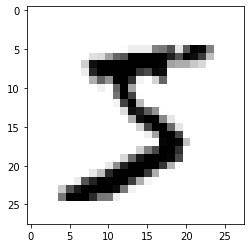

↑の目標値：5


In [29]:
#最初のデータだけ図示
x0 = x_train[0]

# ヒートマップにして表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

#ちなみに認識結果（目標値）は
print('↑の目標値：{0}'.format(y_train[0]))

<hr>
<hr>

# データ変形

In [30]:
from keras.utils import np_utils

In [31]:
#行列の型を変換
x_train = x_train.reshape(60000,28*28)
#float型に変換
x_train = x_train.astype('float32')
#0~1の値に収める
x_train = x_train/255
#目標データも1-of-K符号化法で表す
y_train = np_utils.to_categorical(y_train,10)

In [32]:
#同じことをテストデータに対しても行う
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

<hr>
<hr>

# 学習

In [33]:
#ニューラルネットワークの定義
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はシグモイド関数
model.add(Dense(16,input_dim=784,activation='sigmoid'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [34]:
#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 2.1025 - accuracy: 0.2767 - val_loss: 1.8160 - val_accuracy: 0.5091
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.6343 - accuracy: 0.6112 - val_loss: 1.4588 - val_accuracy: 0.7165
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.3361 - accuracy: 0.7551 - val_loss: 1.2061 - val_accuracy: 0.8023
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.1187 - accuracy: 0.8040 - val_loss: 1.0190 - val_accuracy: 0.8315
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9575 - accuracy: 0.8298 - val_loss: 0.8798 - val_accuracy: 0.8483
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8363 - accuracy: 0.8453 - val_loss: 0.7749 - val_accuracy: 0.8626
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7437 - accuracy: 0.8574 - val_loss: 0.6942 - val_accuracy: 0.8683
Epoch 8/10
60/60 [==

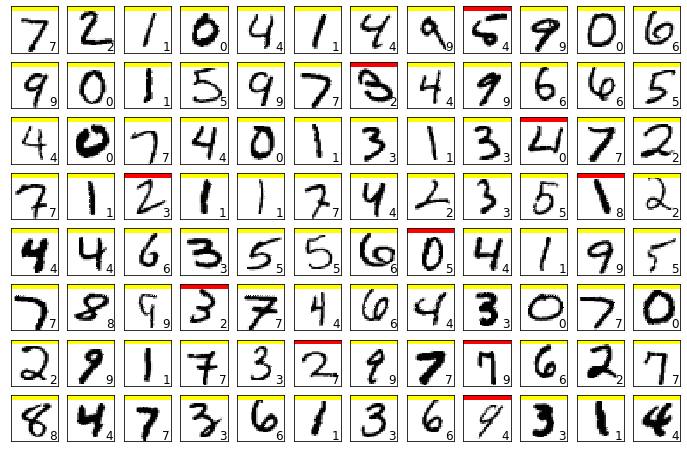

In [35]:
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()    

<hr>
<hr>

# ReLUで学習

In [36]:
#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はReLU関数
model.add(Dense(16,input_dim=784,activation='relu'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 1.4620 - accuracy: 0.5863 - val_loss: 0.8325 - val_accuracy: 0.8054
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.8465 - val_loss: 0.4722 - val_accuracy: 0.8864
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8895 - val_loss: 0.3728 - val_accuracy: 0.9054
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.9030 - val_loss: 0.3292 - val_accuracy: 0.9108
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.9109 - val_loss: 0.3046 - val_accuracy: 0.9161
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9157 - val_loss: 0.2873 - val_accuracy: 0.9184
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.9203 - val_loss: 0.2755 - val_accuracy: 0.9220
Epoch 8/10
60/60 [==

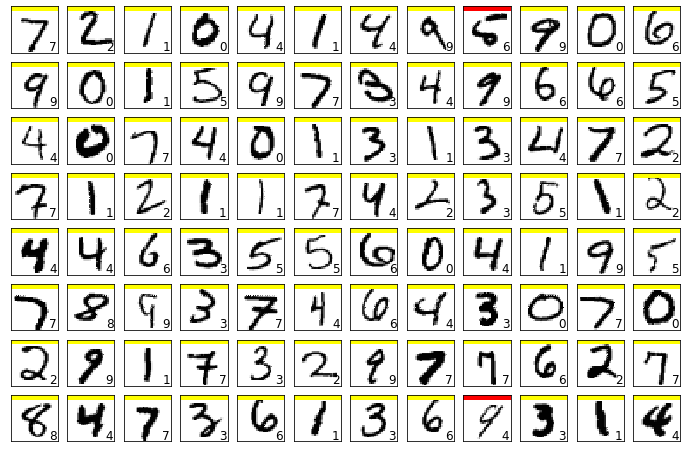

In [37]:
#再評価
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()  

<hr>
<hr>

# フィルター適用

In [38]:
#3*3フィルター
filter = np.array([[0,1,1],[0,1,1],[0,1,1]])
print(filter)


[[0 1 1]
 [0 1 1]
 [0 1 1]]


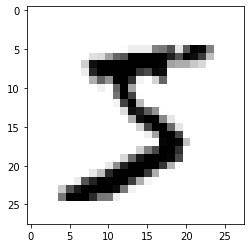

In [39]:
#元画像の表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

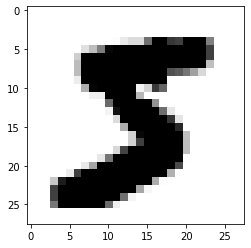

In [42]:
#フィルター適用
def do_filter(x,f):
    filtered=np.zeros((len(x),len(x[0])))
    for i in range(len(x)):
        if(i==0 or i==len(x)-1):
            continue
        else:
            for j in range(len(x[0]-3)):
                if(j==0 or j==len(x[0])-1):
                    continue
                else:
                    gij=0
                    for u in range(-1,2):
                        for v in range(-1,2):
                            gij+=x[i+u][j+v]*f[u+1][v+1]
                    filtered[i][j]=gij
    return filtered

#図示
x0_filtered=do_filter(x0,filter)
plt.figure()
plt.imshow(x0_filtered,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

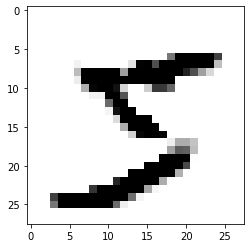

In [44]:
#違うフィルターを適用してみる
filter2 = np.array([[1,1,1],[1,1,1],[-2,-2,-2]])

#図示
x0_filtered=do_filter(x0,filter2)
plt.figure()
plt.imshow(x0_filtered,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()